In [49]:
# This is needed if you need to read data from your Google Drive
from google.colab import drive
drive.mount('/content/drive')

import os

# Change the path to where you run the Jupyter Notebook from.
drive_path = '/content/drive/MyDrive/Machine Learning/Lab04_KMeans/'

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## Load and Explore the Data


In [69]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

In [54]:
#code to ensure path
try:
  drive_path
except NameError:
  drive_path = ''

# load diabetes.csv dataset
df = pd.read_csv(drive_path + "Mall_Customers.csv")

print(df.head())

   CustomerID   Genre  Age  Annual Income (k$)  Spending Score (1-100)
0           1    Male   19                  15                      39
1           2    Male   21                  15                      81
2           3  Female   20                  16                       6
3           4  Female   23                  16                      77
4           5  Female   31                  17                      40


## Scale the Data

In [57]:
# Select features to scale
features = df[['Annual Income (k$)', 'Spending Score (1-100)']]
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)


## Initialize Random Centroids and Perform KMeans Clustering


In [59]:
# KMeans clustering with random initialization
kmeans = KMeans(n_clusters=5, init='random', n_init=10, max_iter=300, random_state=42)
kmeans.fit(scaled_features)

KMeans(init='random', n_clusters=5, n_init=10, random_state=42)

## Label Each Data Point


In [63]:
# Add cluster labels to the original data
df['Cluster'] = kmeans.labels_


## Update Centroids


In [64]:
# Centroids after fitting KMeans
centroids = kmeans.cluster_centers_


## Visualize the Clusters


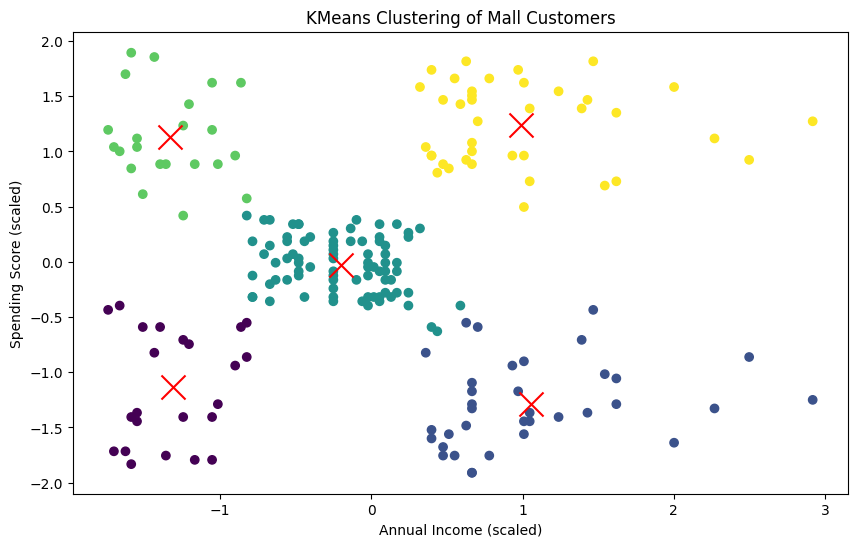

In [66]:
# Visualize the clusters
plt.figure(figsize=(10, 6))
plt.scatter(scaled_features[:, 0], scaled_features[:, 1], c=data['Cluster'], cmap='viridis', marker='o')
plt.scatter(centroids[:, 0], centroids[:, 1], s=300, c='red', marker='x')
plt.title('KMeans Clustering of Mall Customers')
plt.xlabel('Annual Income (scaled)')
plt.ylabel('Spending Score (scaled)')
plt.show()

# KMeans clustering with KMeans++ initialization



In [67]:
kmeans_plus = KMeans(n_clusters=5, init='k-means++', n_init=10, max_iter=300, random_state=42)
kmeans_plus.fit(scaled_features)

KMeans(n_clusters=5, n_init=10, random_state=42)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

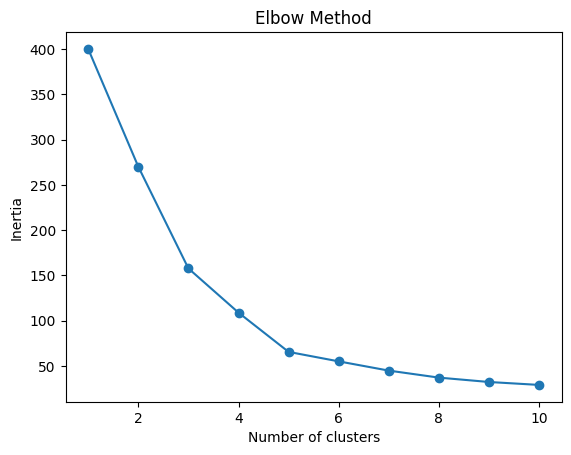

In [68]:
# Elbow method to determine the optimal number of clusters
inertia = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(scaled_features)
    inertia.append(kmeans.inertia_)

plt.plot(range(1, 11), inertia, marker='o')
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.show()


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

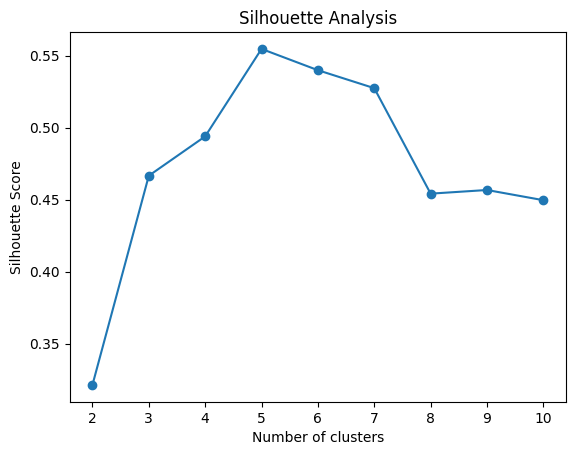

In [70]:
# Silhouette analysis
sil_scores = []
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(scaled_features)
    labels = kmeans.labels_
    sil_scores.append(silhouette_score(scaled_features, labels))

plt.plot(range(2, 11), sil_scores, marker='o')
plt.title('Silhouette Analysis')
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette Score')
plt.show()
